In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import numpy
import re

In [19]:
# url = "http://moss.stanford.edu/results/0/6745597552891"
url = "http://moss.stanford.edu/results/2/8635424362468"
res = requests.get(url)
dom = BeautifulSoup(res.text)

In [46]:
# pattern to get filename
# p = r'.*/(.*)\..*'
p = r'.*/(.*)_.*'

In [47]:
G = nx.Graph()

In [66]:
rows = dom.select('table tr')  #table
# print(rows)
rows = [row.select('td') for row in rows if row.select('td')]
row_data = []
# print(rows)
max_val = min_val = int(rows[0][2].text.strip())

for data in rows: 
    if (int(data[2].text.strip()) > max_val):
        max_val = int(data[2].text.strip())
    elif (int(data[2].text.strip()) < min_val):
        min_val = int(data[2].text.strip())
# print(max_val)
# print(min_val)

for data in rows:
    # print(data)
    node1 = re.search(p, data[0].text.strip())[1]
    # print(node1)
    node2 = re.search(p, data[1].text.strip())[1]
    # print(node2)
    G.add_node(node1)
    G.add_node(node2)
    G.add_edge(node1, node2, weight=numpy.interp(data[2].text.strip(),[min_val,max_val],[0,1]))
    # print(data[2].text.strip())
    # row_data.append([data[0].text.strip(), data[1].text.strip()])


In [49]:
# testing
# G.add_edge('1', '2', weight=0.5)
# G.add_edge('2', '3', weight=0.9)
# G.add_edge('1', '3', weight=0.7)
# G.add_edge('4', '5', weight=0.6)
# G.add_edge('3', '5', weight=0.5)

In [85]:
# pos = nx.circular_layout(G)
pos = nx.spring_layout(G, k=0.5, seed=0)
# pos = nx.random_layout(G)


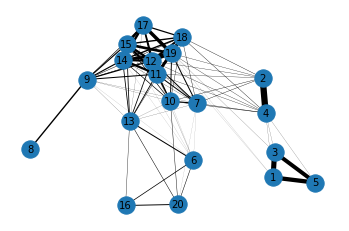

In [87]:
# referenced from https://networkx.org/documentation/stable/tutorial.html#adding-attributes-to-graphs-nodes-and-edges
pos = nx.spring_layout(G, k=0.5, seed=0)
fig = plt.figure()

# draw nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# draw labels
labels = {}
for node_name in G.nodes:
    labels[str(node_name)] = str(node_name)
nx.draw_networkx_labels(G, pos, labels, font_size=10)

# determine edge weights
all_weights = []
for (node1, node2, data) in G.edges(data=True):
    all_weights.append(data['weight'])
unique_weights = list(set(all_weights))

# draw edge weights
t_scale = 5.0 # thickness
c_scale = 0.5 # color
for weight in unique_weights:
    weighted_edges = [(node1, node2) for (node1, node2, edge_attr) in G.edges(data=True) if edge_attr['weight'] == weight]
    width = weight * len(G.nodes)* t_scale / sum(all_weights)
    # following two lines for coloring
    # weights = nx.get_edge_attributes(G,'weight')
    # colors = [G.get_edge_data(*edges)['weight']+c_scale for edges in weighted_edges]
    # print(colors)
    # print(weight)
    # nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width, edge_color = colors, edge_vmin = 0.0, edge_vmax = 1.0, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width, edge_vmin = 0.0, edge_vmax = 1.0)
    
# draw edge labels
# edge_labels = nx.get_edge_attributes(G, "weight")
# nx.draw_networkx_edge_labels(G, pos, edge_labels)
fig.set_facecolor("white")
plt.axis('off')
# plt.title('')
# plt.savefig("test1.png") 
plt.show() 

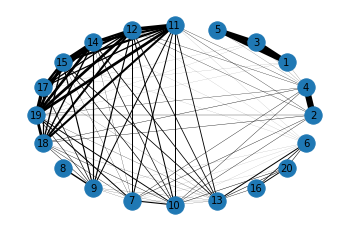

In [71]:
# referenced from https://networkx.org/documentation/stable/tutorial.html#adding-attributes-to-graphs-nodes-and-edges
pos = nx.circular_layout(G)
fig = plt.figure()

# draw nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# draw labels
labels = {}
for node_name in G.nodes:
    labels[str(node_name)] = str(node_name)
nx.draw_networkx_labels(G, pos, labels, font_size=10)

# determine edge weights
all_weights = []
for (node1, node2, data) in G.edges(data=True):
    all_weights.append(data['weight'])
unique_weights = list(set(all_weights))

# draw edge weights
t_scale = 5.0 # thickness
c_scale = 0.5 # color
for weight in unique_weights:
    weighted_edges = [(node1, node2) for (node1, node2, edge_attr) in G.edges(data=True) if edge_attr['weight'] == weight]
    width = weight * len(G.nodes)* t_scale / sum(all_weights)
    # following two lines for coloring
    # weights = nx.get_edge_attributes(G,'weight')
    # colors = [G.get_edge_data(*edges)['weight']+c_scale for edges in weighted_edges]
    # print(colors)
    # print(weight)
    # nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width, edge_color = colors, edge_vmin = 0.0, edge_vmax = 1.0, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width, edge_vmin = 0.0, edge_vmax = 1.0)
    
# draw edge labels
# edge_labels = nx.get_edge_attributes(G, "weight")
# nx.draw_networkx_edge_labels(G, pos, edge_labels)
fig.set_facecolor("white")
plt.axis('off')
# plt.title('')
# plt.savefig("test1.png") 
plt.show() 

In [26]:
# s = "/asda123sasdsd/22sdasdasd.py"
# print(s)
# import re
# p = r'.*/(.*)\..*'
# match = re.search(p, s)
# match[1]